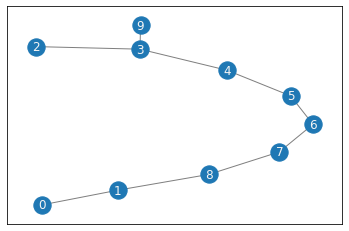

In [1]:
#1. 
#DFS

import networkx as nx
import matplotlib.pyplot as plt

INF = 1e5
NO_PARENT = -1

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {}
		self.gr = nx.Graph()
	
	def draw_graph(self):
		color_map = [self.vert_colors[i] for i in range(self.V)]
		print(color_map)
		#nx.draw_circular(self.gr, node_color=color_map,with_labels = True)
		pos = nx.circular_layout(self.gr)
		nx.draw_networkx_nodes(self.gr,pos=pos,node_size=300,node_color=color_map)
		nx.draw_networkx_edges(self.gr,pos=pos,width=1.0,alpha=0.5)
		nx.draw_networkx_labels(self.gr,pos=pos,font_color="whitesmoke")
		plt.savefig("gr_out_1.png")
			
	def add_edges(self,vert:int,edge_list:list[int]):
		self.E[vert] = edge_list
		self.V = len(self.E)
		self.vert_colors = {}
		for neigh in edge_list:
			self.gr.add_edge(vert,neigh)
	
	def dfs(self, node):
		T = []
		visited = [node]
		def dfs_visit(v):
			for w in self.E[v]:
				if w in visited: continue
				visited.append(w)
				T.append((v,w))
				dfs_visit(w)
		dfs_visit(node)
		return T

g=Graph()
g.add_edges(0, [1, 3, 9, 6, 8])
g.add_edges(1, [0, 8, 6, 4, 2])
g.add_edges(2, [1, 7, 5, 3])
g.add_edges(3, [2, 0, 8, 9, 4])
g.add_edges(4, [3, 1, 7, 5])
g.add_edges(5, [4, 2, 8, 6])
g.add_edges(6, [5, 9, 1, 0, 7])
g.add_edges(7, [6, 4, 2, 8])
g.add_edges(8, [7, 5, 3, 1, 0])
g.add_edges(9, [0, 3, 6])

T = g.dfs(0)

gr = nx.Graph()
for u,v in T:
	gr.add_edge(u,v)
	
pos = nx.spring_layout(gr)
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
plt.savefig("gr_out_dfs.png")

In [7]:
#BFS

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {}
			
	def add_edges(self,vert:int,edge_list:list[int]):
		self.E[vert] = edge_list
		self.V = len(self.E)
		
	def bfs(self, node):
		T = []
		L = [node]
		visited = [node]
		while len(L) != 0:
			v = L.pop(0)
			for w in self.E[v]:
				if w not in visited: # and w not in T:
					L.append(w)
					visited.append(w)
					T.append((v,w))
		return T

g=Graph()
g.add_edges(0, [1, 3, 9, 6, 8])
g.add_edges(1, [0, 8, 6, 4, 2])
g.add_edges(2, [1, 7, 5, 3])
g.add_edges(3, [2, 0, 8, 9, 4])
g.add_edges(4, [3, 1, 7, 5])
g.add_edges(5, [4, 2, 8, 6])
g.add_edges(6, [5, 9, 1, 0, 7])
g.add_edges(7, [6, 4, 2, 8])
g.add_edges(8, [7, 5, 3, 1, 0])
g.add_edges(9, [0, 3, 6])

T = g.bfs(0)

gr = nx.Graph()
for u,v in T:
	gr.add_edge(u,v)
	
pos = nx.spring_layout(gr)
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=1.0,alpha=0.5)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
plt.savefig("gr_out_bfs.png")

NameError: name 'out_file' is not defined

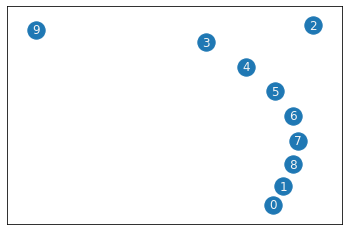

In [2]:
#Prims

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
		self.gr = nx.Graph()
	
	def draw_graph(self):
		color_map = [self.vert_colors[i] for i in range(self.V)]
		print(color_map)
		#nx.draw_circular(self.gr, node_color=color_map,with_labels = True)
		pos = nx.circular_layout(self.gr)
		nx.draw_networkx_nodes(self.gr,pos=pos,node_size=300,node_color=color_map)
		nx.draw_networkx_edges(self.gr,pos=pos,width=1.0,alpha=0.5)
		nx.draw_networkx_labels(self.gr,pos=pos,font_color="whitesmoke")
		plt.savefig("gr_out_1.png")
			
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
		self.vert_colors = {}
		for neigh in edge_list:
			self.gr.add_edge(vert,neigh)

	def prims(self):
		self.edges.sort(key = lambda x: x[2])
		
		i = 0
		u,v,wt = self.edges[0]
		S = set({u,v})
		T = [(u,v,wt)]
		while True:
			if u in S and v in S: # if both the ends are in S then selecting this edge will for a cycle
				self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
				i = 0 # start at the start of the sorted edge list
			elif (u not in S and v in S) or (u in S and v not in S):	# is one of the vertex of the edge is in S then use this edge
				S.add(u)
				S.add(v)
				T.append((u,v,wt))	# add the edge to the MST
				self.edges.remove((u,v,wt))	# remove this edge from our list of edges
				i = 0	# again start the search from the begining of edge list
			else:
				i += 1	# if none of the vertices are in S, then skip this edge for now and mov to the next edge
			
			if len(self.edges) == 0: break	# if all edges from the edge list are removed, then end the loop
			u,v,wt = self.edges[i]

		return T

g=Graph()
g.add_edges( 0 , [1, 2] , [6, 10] )
g.add_edges( 1 , [0, 2, 3, 4] , [6, 12, 11, 14] )
g.add_edges( 2 , [0, 1, 3, 6, 7] , [10, 12, 12, 8, 16] )
g.add_edges( 3 , [1, 2, 5, 6] , [11, 12, 6, 3] )
g.add_edges( 4 , [1, 5, 8] , [14, 4, 6] )
g.add_edges( 5 , [3, 4, 8] , [6, 4, 12] )
g.add_edges( 6 , [2, 3, 8, 9] , [8, 3, 16, 6] )
g.add_edges( 7 , [2, 9] , [16, 8] )
g.add_edges( 8 , [4, 5, 6, 9] , [6, 12, 16, 13] )
g.add_edges( 9 , [6, 7, 8] , [6, 8, 13] )

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
plt.savefig(out_file)

{(0, 1): Text(-0.07632698793243414, 0.90967776838965, '{}'),
 (1, 8): Text(-0.16154296193441944, 0.7042736350148674, '{}'),
 (8, 7): Text(-0.21446310110394096, 0.45870977674701274, '{}'),
 (7, 6): Text(-0.21779598965325955, 0.19231196853003354, '{}'),
 (6, 5): Text(-0.1597694867650131, -0.07362534180700736, '{}'),
 (5, 4): Text(-0.040084056219019136, -0.3210172893339655, '{}'),
 (4, 3): Text(0.12232917319989348, -0.5420897245574994, '{}'),
 (3, 2): Text(0.22239812160915864, -0.753543284676137, '{}'),
 (3, 9): Text(0.3172904547972537, -0.644920864973578, '{}')}

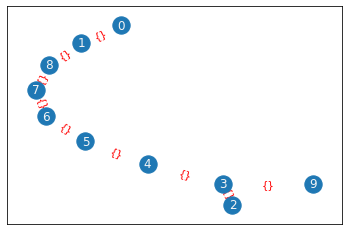

In [3]:
#Kruskals

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
				
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
	
	def kruskals(self):
		# Function to find which connected component set does this vertex belong to
		def find_set(node):	
			for i in S:
				if node in S[i]: return i
			return -1

		self.edges.sort(key = lambda x: x[2]) # sort edges as per their weight
		u,v,wt = self.edges[0] # pick up the first edge from the sorted list
		S = {i:{i} for i in range(self.V)}	# each vertex is its own connected component
		T = [] # the MST is initially empty
		while True:
			u_set = find_set(u) # get the set to which the vertex u belongs
			v_set = find_set(v) # get the set to which the vertex v belongs
			if u_set != v_set: # if both u,v belong to same set, then adding the edge to MST will create cycles, so ignore the edge
				S[u_set] = S[u_set].union(S[v_set]) # else if they are from different sets, then merge these sets
				S.pop(v_set,None)
				T.append((u,v,wt))	# add the edge to the MST
			self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
			if len(self.edges) == 0:
				break
			else:
				u,v,wt = self.edges[0]

		return T

g=Graph()
g.add_edges( 0 , [1, 2] , [6, 10] )
g.add_edges( 1 , [0, 2, 3, 4] , [6, 12, 11, 14] )
g.add_edges( 2 , [0, 1, 3, 6, 7] , [10, 12, 12, 8, 16] )
g.add_edges( 3 , [1, 2, 5, 6] , [11, 12, 6, 3] )
g.add_edges( 4 , [1, 5, 8] , [14, 4, 6] )
g.add_edges( 5 , [3, 4, 8] , [6, 4, 12] )
g.add_edges( 6 , [2, 3, 8, 9] , [8, 3, 16, 6] )
g.add_edges( 7 , [2, 9] , [16, 8] )
g.add_edges( 8 , [4, 5, 6, 9] , [6, 12, 16, 13] )
g.add_edges( 9 , [6, 7, 8] , [6, 8, 13] )

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
nx.draw_networkx_edge_labels(gr, pos, font_color='red')
#plt.savefig(out_file)

MST Weight =  13

Following flights to be removed

San Fransisco  to  Seatle

LA  to  San Fransisco

LA  to  Denver

LA  to  Dallas

San Diego  to  LA

San Diego  to  Denver

San Diego  to  Dallas

Denver  to  San Fransisco

Denver  to  LA

Denver  to  San Diego

Denver  to  Dallas

Denver  to  Chicago

Dallas  to  San Fransisco

Dallas  to  LA

Dallas  to  San Diego

Dallas  to  Denver

Dallas  to  St Louis

Dallas  to  Atlanta

St Louis  to  Denver

St Louis  to  Dallas

St Louis  to  Chicago

St Louis  to  Atlanta

Chicago  to  Seatle

Chicago  to  Denver

Chicago  to  St Louis

Chicago  to  Detroit

Detroit  to  St Louis

Detroit  to  Chicago

Detroit  to  Boston

Detroit  to  NY

Boston  to  Chicago

Boston  to  Detroit

Boston  to  Bangor

Boston  to  NY

NY  to  Chicago

NY  to  Detroit

NY  to  Boston

NY  to  DC

DC  to  Boston

DC  to  NY

DC  to  Atlanta

Atlanta  to  LA

Atlanta  to  Dallas

Atlanta  to  St Louis

Atlanta  to  DC


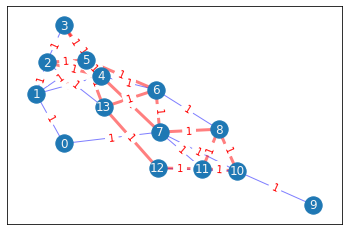

In [11]:
#2.

#Using Prims

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
		self.gr = nx.Graph()
	
	def draw_graph(self):
		color_map = [self.vert_colors[i] for i in range(self.V)]
		print(color_map)
		#nx.draw_circular(self.gr, node_color=color_map,with_labels = True)
		pos = nx.circular_layout(self.gr)
		nx.draw_networkx_nodes(self.gr,pos=pos,node_size=300,node_color=color_map)
		nx.draw_networkx_edges(self.gr,pos=pos,width=1.0,alpha=0.5)
		nx.draw_networkx_labels(self.gr,pos=pos,font_color="whitesmoke")
		plt.savefig("gr_out_1.png")
			
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
		self.vert_colors = {}
		for neigh in edge_list:
			self.gr.add_edge(vert,neigh)

	def prims(self):
		self.edges.sort(key = lambda x: x[2])
		
		i = 0
		u,v,wt = self.edges[0]
		S = set({u,v})
		T = [(u,v,wt)]
		while True:
			if u in S and v in S: # if both the ends are in S then selecting this edge will for a cycle
				self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
				i = 0 # start at the start of the sorted edge list
			elif (u not in S and v in S) or (u in S and v not in S):	# is one of the vertex of the edge is in S then use this edge
				S.add(u)
				S.add(v)
				T.append((u,v,wt))	# add the edge to the MST
				self.edges.remove((u,v,wt))	# remove this edge from our list of edges
				i = 0	# again start the search from the begining of edge list
			else:
				i += 1	# if none of the vertices are in S, then skip this edge for now and mov to the next edge
			
			if len(self.edges) == 0: break	# if all edges from the edge list are removed, then end the loop
			u,v,wt = self.edges[i]

		return T

g=Graph()
places=['Seatle','San Fransisco','LA','San Diego','Denver','Dallas','St Louis','Chicago','Detroit','Bangor','Boston','NY','DC','Atlanta']

g.add_edges( 0 , [1, 7] , [1, 1] )
g.add_edges( 1 , [0, 2, 4, 5] , [1, 1, 1, 1] )
g.add_edges( 2 , [1, 3, 4, 5, 13] , [1, 1, 1, 1, 1] )
g.add_edges( 3 , [2, 4, 5] , [1, 1, 1] )
g.add_edges( 4 , [1, 2, 3, 5, 6, 7] , [1, 1, 1, 1, 1, 1] )
g.add_edges( 5 , [1, 2, 3, 4, 6, 13] , [1, 1, 1, 1, 1, 1] )
g.add_edges( 6 , [4, 5, 7, 8, 13] , [1, 1, 1, 1, 1] )
g.add_edges( 7 , [0, 4, 6, 8, 10, 11] , [1, 1, 1, 1, 1, 1] )
g.add_edges( 8 , [6, 7, 10, 11] , [1, 1, 1, 1] )
g.add_edges( 9 , [10] , [1] )
g.add_edges( 10 , [7, 8, 9, 11, 12] , [1, 1, 1, 1, 1] )
g.add_edges( 11 , [7, 8, 10, 12] , [1, 1, 1, 1] )
g.add_edges( 12 , [10, 11, 13] , [1, 1, 1] )
g.add_edges( 13 , [2, 5, 6, 12] , [1, 1, 1, 1] )

gr = nx.Graph()
out_file = "gr_out_prims_q2.png"
edge_labels = {}
for u,v,wt in g.edges:
	gr.add_edge(u,v,color='r',width=3.0)
	edge_labels[(u,v)] = wt

MST = g.prims()
wt = 0
for e in MST:
	gr.remove_edge(e[0],e[1])
	gr.add_edge(e[0],e[1],color='b',width=1.0)
	wt += e[2]
	# print (e[0],",",e[1])

print("MST Weight = ",wt)

for u,v,wt in MST:
	lst = g.E[u].remove((v,wt))

print("Following flights to be removed")
for u in g.E:
	for v,wt in g.E[u]:
		print(places[u]," to ", places[v])

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
nx.draw_networkx_edge_labels(gr, pos, edge_labels,font_color='red')
plt.savefig(out_file)

MST Weight =  13

Following flights to be removed

San Fransisco  to  Seatle

LA  to  San Fransisco

LA  to  Denver

LA  to  Dallas

San Diego  to  LA

San Diego  to  Denver

San Diego  to  Dallas

Denver  to  San Fransisco

Denver  to  LA

Denver  to  San Diego

Denver  to  Dallas

Denver  to  Chicago

Dallas  to  San Fransisco

Dallas  to  LA

Dallas  to  San Diego

Dallas  to  Denver

Dallas  to  St Louis

Dallas  to  Atlanta

St Louis  to  Denver

St Louis  to  Dallas

St Louis  to  Chicago

St Louis  to  Atlanta

Chicago  to  Seatle

Chicago  to  Denver

Chicago  to  St Louis

Chicago  to  Detroit

Detroit  to  St Louis

Detroit  to  Chicago

Detroit  to  Boston

Detroit  to  NY

Boston  to  Chicago

Boston  to  Detroit

Boston  to  Bangor

Boston  to  NY

NY  to  Chicago

NY  to  Detroit

NY  to  Boston

NY  to  DC

DC  to  Boston

DC  to  NY

DC  to  Atlanta

Atlanta  to  LA

Atlanta  to  Dallas

Atlanta  to  St Louis

Atlanta  to  DC


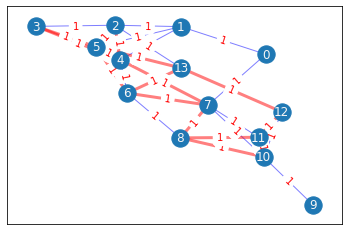

In [12]:
#Using Kruskals

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
				
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
	
	def kruskals(self):
		# Function to find which connected component set does this vertex belong to
		def find_set(node):	
			for i in S:
				if node in S[i]: return i
			return -1

		self.edges.sort(key = lambda x: x[2]) # sort edges as per their weight
		u,v,wt = self.edges[0] # pick up the first edge from the sorted list
		S = {i:{i} for i in range(self.V)}	# each vertex is its own connected component
		T = [] # the MST is initially empty
		while True:
			u_set = find_set(u) # get the set to which the vertex u belongs
			v_set = find_set(v) # get the set to which the vertex v belongs
			if u_set != v_set: # if both u,v belong to same set, then adding the edge to MST will create cycles, so ignore the edge
				S[u_set] = S[u_set].union(S[v_set]) # else if they are from different sets, then merge these sets
				S.pop(v_set,None)
				T.append((u,v,wt))	# add the edge to the MST
			self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
			if len(self.edges) == 0:
				break
			else:
				u,v,wt = self.edges[0]

		return T

g=Graph()
places=['Seatle','San Fransisco','LA','San Diego','Denver','Dallas','St Louis','Chicago','Detroit','Bangor','Boston','NY','DC','Atlanta']

g.add_edges( 0 , [1, 7] , [1, 1] )
g.add_edges( 1 , [0, 2, 4, 5] , [1, 1, 1, 1] )
g.add_edges( 2 , [1, 3, 4, 5, 13] , [1, 1, 1, 1, 1] )
g.add_edges( 3 , [2, 4, 5] , [1, 1, 1] )
g.add_edges( 4 , [1, 2, 3, 5, 6, 7] , [1, 1, 1, 1, 1, 1] )
g.add_edges( 5 , [1, 2, 3, 4, 6, 13] , [1, 1, 1, 1, 1, 1] )
g.add_edges( 6 , [4, 5, 7, 8, 13] , [1, 1, 1, 1, 1] )
g.add_edges( 7 , [0, 4, 6, 8, 10, 11] , [1, 1, 1, 1, 1, 1] )
g.add_edges( 8 , [6, 7, 10, 11] , [1, 1, 1, 1] )
g.add_edges( 9 , [10] , [1] )
g.add_edges( 10 , [7, 8, 9, 11, 12] , [1, 1, 1, 1, 1] )
g.add_edges( 11 , [7, 8, 10, 12] , [1, 1, 1, 1] )
g.add_edges( 12 , [10, 11, 13] , [1, 1, 1] )
g.add_edges( 13 , [2, 5, 6, 12] , [1, 1, 1, 1] )

gr = nx.Graph()
out_file = "gr_out_kruskals_q2.png"
edge_labels = {}
for u,v,wt in g.edges:
	gr.add_edge(u,v,color='r',width=3.0)
	edge_labels[(u,v)] = wt

MST = g.kruskals()
wt = 0
for e in MST:
	gr.remove_edge(e[0],e[1])
	gr.add_edge(e[0],e[1],color='b',width=1.0)
	wt += e[2]
	# print (e[0],",",e[1])

print("MST Weight = ",wt)

for u,v,wt in MST:
	lst = g.E[u].remove((v,wt))

print("Following flights to be removed")
for u in g.E:
	for v,wt in g.E[u]:
		print(places[u]," to ", places[v])

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
nx.draw_networkx_edge_labels(gr, pos, edge_labels,font_color='red')
plt.savefig(out_file)

Path to be paved are as follows:



Oasis to Deep Springs (10 km)

Dryer to Oasis (21 km)

Silver Pea to Oasis (23 km)

Silver Pea to Goldfield (20 km)

Goldfield to Lida (20 km)

Gold Point to Lida (12 km)

Goldfield to Tonopah (35 km)

Tonopah to Manhattan (25 km)

Beatty to Gold Point (45 km)

Tonopah to Warm Springs (55 km)

MST Weight =  266


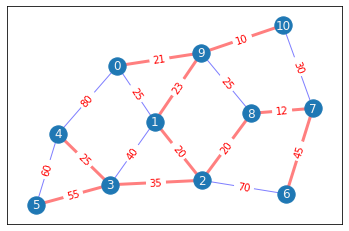

In [13]:
#3.

#Using Prims

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
		self.gr = nx.Graph()
	
	def draw_graph(self):
		color_map = [self.vert_colors[i] for i in range(self.V)]
		print(color_map)
		#nx.draw_circular(self.gr, node_color=color_map,with_labels = True)
		pos = nx.circular_layout(self.gr)
		nx.draw_networkx_nodes(self.gr,pos=pos,node_size=300,node_color=color_map)
		nx.draw_networkx_edges(self.gr,pos=pos,width=1.0,alpha=0.5)
		nx.draw_networkx_labels(self.gr,pos=pos,font_color="whitesmoke")
		plt.savefig("gr_out_1.png")
			
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
		self.vert_colors = {}
		for neigh in edge_list:
			self.gr.add_edge(vert,neigh)

	def prims(self):
		self.edges.sort(key = lambda x: x[2])
		
		i = 0
		u,v,wt = self.edges[0]
		S = set({u,v})
		T = [(u,v,wt)]
		while True:
			if u in S and v in S: # if both the ends are in S then selecting this edge will for a cycle
				self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
				i = 0 # start at the start of the sorted edge list
			elif (u not in S and v in S) or (u in S and v not in S):	# is one of the vertex of the edge is in S then use this edge
				S.add(u)
				S.add(v)
				T.append((u,v,wt))	# add the edge to the MST
				self.edges.remove((u,v,wt))	# remove this edge from our list of edges
				i = 0	# again start the search from the begining of edge list
			else:
				i += 1	# if none of the vertices are in S, then skip this edge for now and mov to the next edge
			
			if len(self.edges) == 0: break	# if all edges from the edge list are removed, then end the loop
			u,v,wt = self.edges[i]

		return T

g=Graph()
places = ["Dryer","Silver Pea","Goldfield","Tonopah","Manhattan","Warm Springs","Beatty","Gold Point","Lida","Oasis","Deep Springs"]
g.add_edges( 0 , [1, 4, 9] , [25, 80, 21] )
g.add_edges( 1 , [0, 2, 3, 9] , [25, 20, 40, 23] )
g.add_edges( 2 , [1, 3, 6, 8] , [20, 35, 70, 20] )
g.add_edges( 3 , [1, 2, 4, 5] , [40, 35, 25, 55] )
g.add_edges( 4 , [0, 3, 5] , [80, 25, 60] )
g.add_edges( 5 , [3, 4] , [55, 60] )
g.add_edges( 6 , [2, 7] , [70, 45] )
g.add_edges( 7 , [6, 8, 10] , [45, 12, 30] )
g.add_edges( 8 , [2, 7, 9] , [20, 12, 25] )
g.add_edges( 9 , [0, 1, 8, 10] , [21, 23, 25, 10] )
g.add_edges( 10 , [7, 9] , [30, 10] )

gr = nx.Graph()
out_file = "gr_out_prims_q3.png"
edge_labels = {}

for u,v,wt in g.edges:
	gr.add_edge(u,v,color='b',width=1.0)
	edge_labels[(u,v)] = wt

MST = g.prims()
wt = 0
print("Path to be paved are as follows:\n")
for e in MST:
	gr.remove_edge(e[0],e[1])
	gr.add_edge(e[0],e[1],color='r',width=3.0)
	wt += e[2]
	print("%s to %s (%d km)" % (places[e[0]],places[e[1]],e[2]))

print("MST Weight = ",wt)

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
nx.draw_networkx_edge_labels(gr, pos, edge_labels,font_color='red')
plt.savefig(out_file)

Path to be paved are as follows:



Oasis to Deep Springs (10 km)

Gold Point to Lida (12 km)

Silver Pea to Goldfield (20 km)

Goldfield to Lida (20 km)

Dryer to Oasis (21 km)

Silver Pea to Oasis (23 km)

Tonopah to Manhattan (25 km)

Goldfield to Tonopah (35 km)

Beatty to Gold Point (45 km)

Tonopah to Warm Springs (55 km)

MST Weight =  266


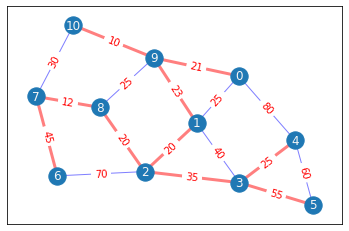

In [14]:
#Using Kruskals

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
				
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
	
	def kruskals(self):
		# Function to find which connected component set does this vertex belong to
		def find_set(node):	
			for i in S:
				if node in S[i]: return i
			return -1

		self.edges.sort(key = lambda x: x[2]) # sort edges as per their weight
		u,v,wt = self.edges[0] # pick up the first edge from the sorted list
		S = {i:{i} for i in range(self.V)}	# each vertex is its own connected component
		T = [] # the MST is initially empty
		while True:
			u_set = find_set(u) # get the set to which the vertex u belongs
			v_set = find_set(v) # get the set to which the vertex v belongs
			if u_set != v_set: # if both u,v belong to same set, then adding the edge to MST will create cycles, so ignore the edge
				S[u_set] = S[u_set].union(S[v_set]) # else if they are from different sets, then merge these sets
				S.pop(v_set,None)
				T.append((u,v,wt))	# add the edge to the MST
			self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
			if len(self.edges) == 0:
				break
			else:
				u,v,wt = self.edges[0]

		return T

g=Graph()
places = ["Dryer","Silver Pea","Goldfield","Tonopah","Manhattan","Warm Springs","Beatty","Gold Point","Lida","Oasis","Deep Springs"]
g.add_edges( 0 , [1, 4, 9] , [25, 80, 21] )
g.add_edges( 1 , [0, 2, 3, 9] , [25, 20, 40, 23] )
g.add_edges( 2 , [1, 3, 6, 8] , [20, 35, 70, 20] )
g.add_edges( 3 , [1, 2, 4, 5] , [40, 35, 25, 55] )
g.add_edges( 4 , [0, 3, 5] , [80, 25, 60] )
g.add_edges( 5 , [3, 4] , [55, 60] )
g.add_edges( 6 , [2, 7] , [70, 45] )
g.add_edges( 7 , [6, 8, 10] , [45, 12, 30] )
g.add_edges( 8 , [2, 7, 9] , [20, 12, 25] )
g.add_edges( 9 , [0, 1, 8, 10] , [21, 23, 25, 10] )
g.add_edges( 10 , [7, 9] , [30, 10] )

gr = nx.Graph()
out_file = "gr_out_kruskals_q3.png"
edge_labels = {}
for u,v,wt in g.edges:
	gr.add_edge(u,v,color='b',width=1.0)
	edge_labels[(u,v)] = wt

MST = g.kruskals()
wt = 0
print("Path to be paved are as follows:\n")
for e in MST:
	gr.remove_edge(e[0],e[1])
	gr.add_edge(e[0],e[1],color='r',width=3.0)
	wt += e[2]
	print("%s to %s (%d km)" % (places[e[0]],places[e[1]],e[2]))

print("MST Weight = ",wt)

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
nx.draw_networkx_edge_labels(gr, pos, edge_labels,font_color='red')
plt.savefig(out_file)

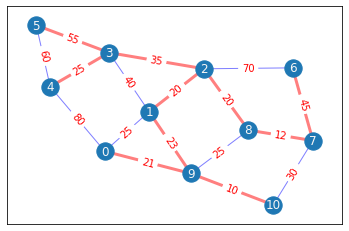

In [15]:
#4.

import networkx as nx
import matplotlib.pyplot as plt

class Graph():
	def __init__(self):
		self.V = 0
		self.E = {} # set of edges and weights
		self.edges=[] # tuple (u,v,weight)
		self.gr = nx.Graph()
	
	def draw_graph(self):
		color_map = [self.vert_colors[i] for i in range(self.V)]
		print(color_map)
		#nx.draw_circular(self.gr, node_color=color_map,with_labels = True)
		pos = nx.circular_layout(self.gr)
		nx.draw_networkx_nodes(self.gr,pos=pos,node_size=300,node_color=color_map)
		nx.draw_networkx_edges(self.gr,pos=pos,width=1.0,alpha=0.5)
		nx.draw_networkx_labels(self.gr,pos=pos,font_color="whitesmoke")
		plt.savefig("gr_out_1.png")
			
	def add_edges(self,vert:int,edge_list:list[int],weight_list:list[int]):
		vl = [vert for _ in range(len(edge_list))]
		self.E[vert] = list(zip(edge_list,weight_list))
		self.edges += list(zip(vl,edge_list,weight_list))
		self.V = len(self.E)
		self.vert_colors = {}
		for neigh in edge_list:
			self.gr.add_edge(vert,neigh)

	def max_kruskals(self):
		# Function to find which connected component set does this vertex belong to
		def find_set(node):	
			for i in S:
				if node in S[i]: return i
			return -1

		self.edges.sort(key = lambda x: x[2],reverse=True) # sort edges as per their weight
		u,v,wt = self.edges[0] # pick up the first edge from the sorted list
		S = {i:{i} for i in range(self.V)}	# each vertex is its own connected component
		T = [] # the MST is initially empty
		while True:
			u_set = find_set(u) # get the set to which the vertex u belongs
			v_set = find_set(v) # get the set to which the vertex v belongs
			if u_set != v_set: # if both u,v belong to same set, then adding the edge to MST will create cycles, so ignore the edge
				S[u_set] = S[u_set].union(S[v_set]) # else if they are from different sets, then merge these sets
				S.pop(v_set,None)
				T.append((u,v,wt))	# add the edge to the MST
			self.edges.remove((u,v,wt)) # so, remove this edge from the list of sorted edges as this will be never used
			if len(self.edges) == 0:
				break
			else:
				u,v,wt = self.edges[0]

		return T

g=Graph()
g.add_edges( 0 , [1, 2] , [6, 10] )
g.add_edges( 1 , [0, 2, 3, 4] , [6, 12, 11, 14] )
g.add_edges( 2 , [0, 1, 3, 6, 7] , [10, 12, 12, 8, 16] )
g.add_edges( 3 , [1, 2, 5, 6] , [11, 12, 6, 3] )
g.add_edges( 4 , [1, 5, 8] , [14, 4, 6] )
g.add_edges( 5 , [3, 4, 8] , [6, 4, 12] )
g.add_edges( 6 , [2, 3, 8, 9] , [8, 3, 16, 6] )
g.add_edges( 7 , [2, 9] , [16, 8] )
g.add_edges( 8 , [4, 5, 6, 9] , [6, 12, 16, 13] )
g.add_edges( 9 , [6, 7, 8] , [6, 8, 13] )

pos = nx.spring_layout(gr)
plt.figure()
edge_colors = nx.get_edge_attributes(gr,'color').values()
edge_widths = nx.get_edge_attributes(gr,'width').values()
nx.draw_networkx_nodes(gr,pos=pos,node_size=300)
nx.draw_networkx_edges(gr,pos=pos,width=list(edge_widths),alpha=0.5,edge_color=edge_colors)
nx.draw_networkx_labels(gr,pos=pos,font_color="whitesmoke")
nx.draw_networkx_edge_labels(gr, pos, edge_labels,font_color='red')
plt.savefig(out_file)